# 2.1 Задача (sleep equation)

# 2.1.1 Пример 1

In [1]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# stats models: regression fitting
import statsmodels.formula.api as smf
# data visualization
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


<AxesSubplot:xlabel='totwrk', ylabel='sleep'>

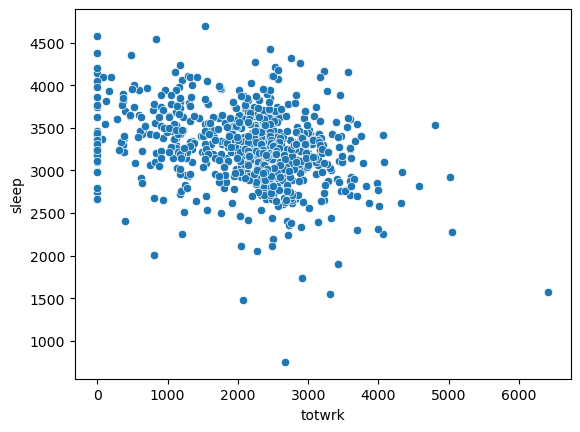

In [4]:
sns.scatterplot(data=df, y='sleep', x='totwrk')

<AxesSubplot:xlabel='totwrk', ylabel='sleep'>

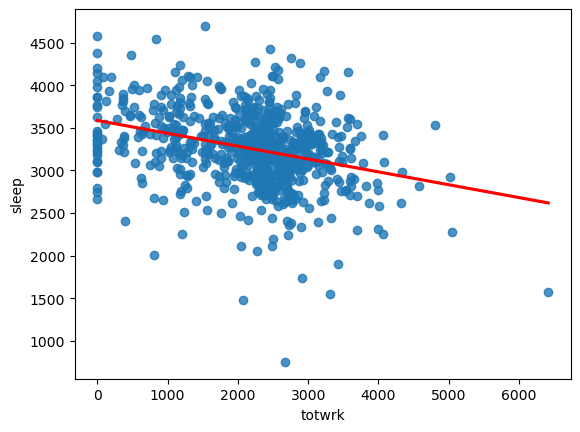

In [5]:
sns.regplot(data=df, y='sleep', x='totwrk', ci=None, line_kws={"color": "r"})

In [6]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~totwrk', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept    3586.38
totwrk         -0.15
dtype: float64

## Спецификация 


$$
sleep = 3586.38 - 0.15*totwork
$$

1) При увеличении занятости на 1 мин/нед, меньшается продолжительность сна на 0.15 мин/нед

###### Параметры оптимальной прямой sleep на totwrk без константы ######

In [7]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~ - 1 + totwrk', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

totwrk    1.26
dtype: float64

# 2.1.2 Пример 2 


<AxesSubplot:xlabel='age', ylabel='sleep'>

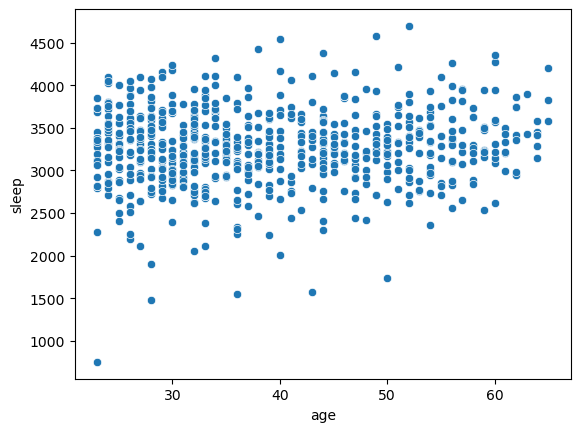

In [9]:
sns.scatterplot(data=df, y='sleep', x='age')

<AxesSubplot:xlabel='age', ylabel='sleep'>

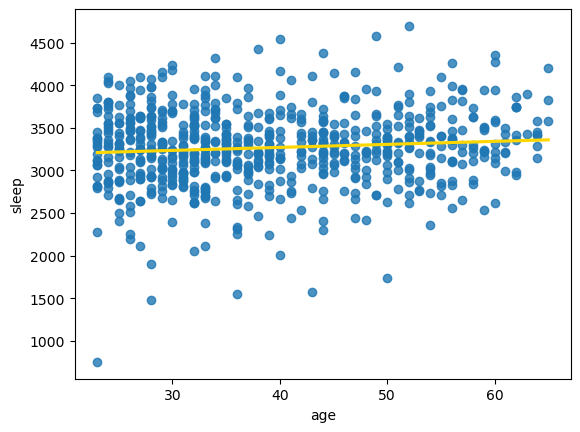

In [28]:
sns.regplot(data=df, y='sleep', x='age', ci=None, line_kws={"color": "gold"})

In [29]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~age', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept    3128.91
age             3.54
dtype: float64

## Спецификация 

$$
sleep = 3128.91 + 3.54*age
$$

1) При увеличении возраста на 1 год, продолжительность сна увеличивается на 3.54 мин/нед

###### Параметры оптимальной прямой sleep на age без константы ######

In [30]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~-1 + age', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

age    77.82
dtype: float64

# 2.1.3 Пример 3

<AxesSubplot:xlabel='totwrk', ylabel='sleep'>

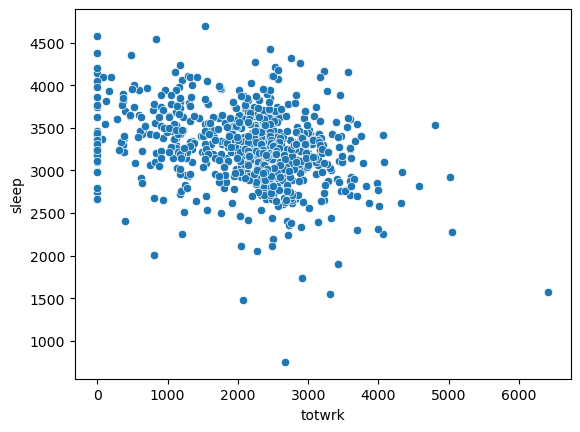

In [32]:
sns.scatterplot(data=df, y='sleep', x='totwrk')

<AxesSubplot:xlabel='totwrk', ylabel='sleep'>

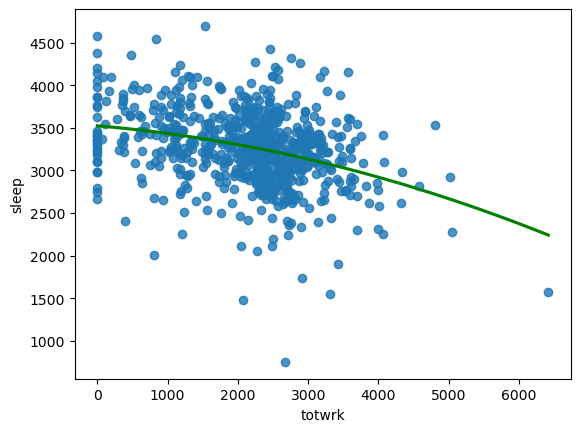

In [35]:
sns.regplot(data=df, y='sleep', x='totwrk', ci=None, order=2, line_kws={"color": "green"})

In [26]:
# подгонка параболы
fitted_pol = smf.ols(formula='sleep~totwrk+I(totwrk**2)', data=df).fit()
# коэффициенты с округлением
fitted_pol.params.round(2)

Intercept         3523.59
totwrk              -0.07
I(totwrk ** 2)      -0.00
dtype: float64

# 2.1.4 Пример 4

<AxesSubplot:xlabel='age', ylabel='sleep'>

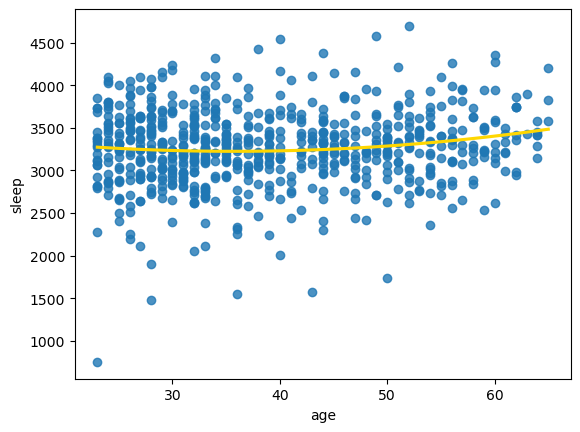

In [36]:
sns.regplot(data=df, y='sleep', x='age', ci=None, order = 2,  line_kws={"color": "gold"})

In [34]:
# подгонка параболы
fitted_pol = smf.ols(formula='sleep~age+I(age**2)', data=df).fit()
# коэффициенты с округлением
fitted_pol.params.round(2)

Intercept      3608.03
age             -21.49
I(age ** 2)       0.30
dtype: float64

# 2.1.5 Пример 5

In [37]:
# подгонка плоскости
fitted_plane = smf.ols(formula='sleep~totwrk+age', data=df).fit()
# коэффициенты с округлением
fitted_plane.params.round(2)

Intercept    3469.20
totwrk         -0.15
age             2.92
dtype: float64

# 2.2 Задача (labour equation)

# 2.2.1 Пример 1